In [1]:
import pandas

In [2]:
url = "https://data.urbansharing.com/oslobysykkel.no/trips/v1/2022/0{n}.csv"

In [3]:
data = pandas.concat([
pandas.read_csv(url.format(n=n), parse_dates=[0,1])
    for n in [4, 5, 6]
])

<AxesSubplot:ylabel='Frequency'>

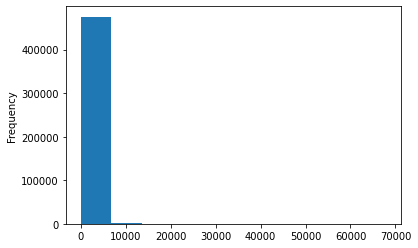

In [5]:
data['duration'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

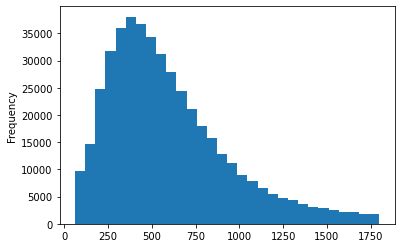

In [6]:
data[data['duration'] < 60*30]['duration'].plot.hist(bins=30)

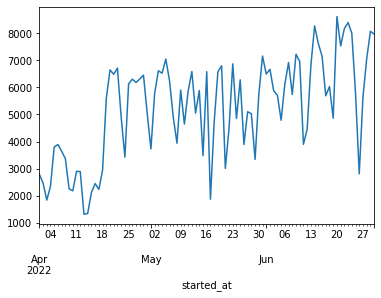

In [7]:
data.groupby(pandas.Grouper(key='started_at', freq='D')).size().plot()
None

<AxesSubplot:xlabel='started_at'>

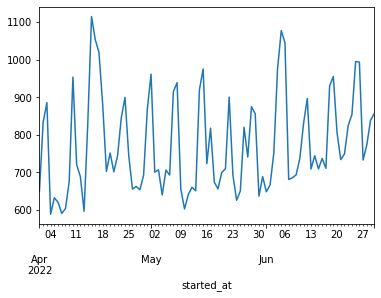

In [8]:
data.groupby(pandas.Grouper(key='started_at', freq='D')).mean()['duration'].plot()

In [9]:
data.groupby(pandas.Grouper(key='started_at', freq='H')).size()['2022-04']

started_at
2022-04-01 03:00:00+00:00      9
2022-04-01 04:00:00+00:00     53
2022-04-01 05:00:00+00:00    212
2022-04-01 06:00:00+00:00    336
2022-04-01 07:00:00+00:00    166
                            ... 
2022-04-30 19:00:00+00:00    183
2022-04-30 20:00:00+00:00    136
2022-04-30 21:00:00+00:00    135
2022-04-30 22:00:00+00:00     95
2022-04-30 23:00:00+00:00      1
Freq: H, Length: 717, dtype: int64

In [10]:
by_hour = data.groupby(pandas.Grouper(key='started_at', freq='h')).size()

In [11]:
by_hour.index.hour

Int64Index([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
            ...
            13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
           dtype='int64', name='started_at', length=2180)

In [12]:
df_hourly = pandas.DataFrame({'date': by_hour.index.date,
                              'hour': by_hour.index.hour,
                              'count': by_hour})

In [13]:
df_hourly = df_hourly.pivot(index='date', columns='hour', values='count').fillna(0)

<AxesSubplot:xlabel='hour'>

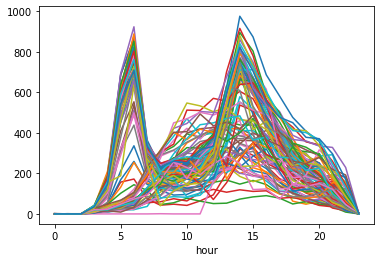

In [14]:
df_hourly.T.plot(legend=False)

In [15]:
from sklearn.cluster import KMeans

In [16]:
ks = list(range(1, 7))
scores = [KMeans(n_clusters=k).fit(df_hourly).inertia_ for k in ks]

In [17]:
import matplotlib.pyplot as plt

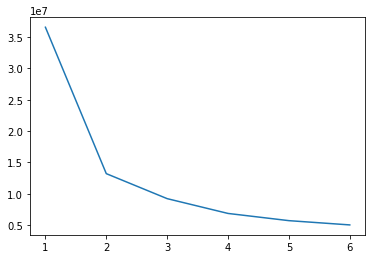

In [18]:
plt.plot(ks, scores)

In [19]:
model = KMeans(n_clusters=2).fit(df_hourly)

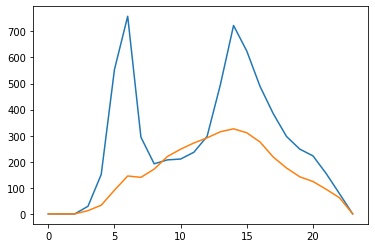

In [20]:
plt.plot(model.cluster_centers_.T)
None

In [21]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int32)

<AxesSubplot:>

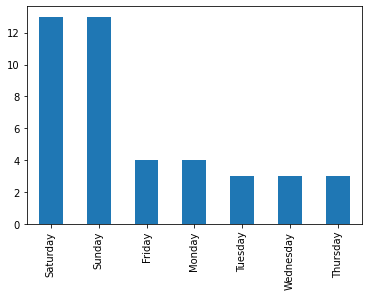

In [22]:
pandas.to_datetime(
    df_hourly.index
)[model.labels_.astype(bool)].day_name().value_counts().plot.bar()

<AxesSubplot:>

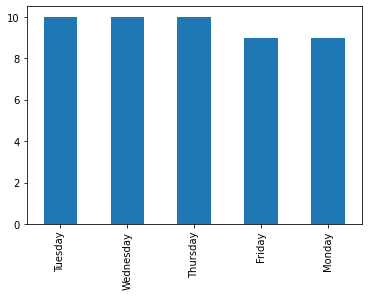

In [23]:
pandas.to_datetime(
    df_hourly.index
)[~model.labels_.astype(bool)].day_name().value_counts().plot.bar()

<AxesSubplot:xlabel='hour'>

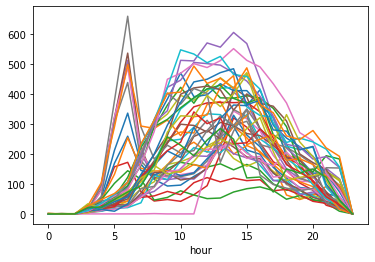

In [24]:
df_hourly.loc[model.labels_.astype(bool)].T.plot(legend=False)

<AxesSubplot:xlabel='hour'>

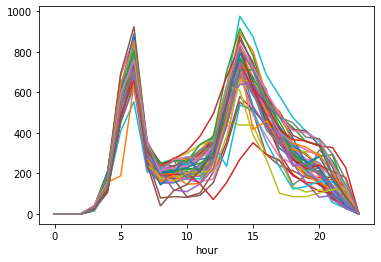

In [25]:
df_hourly.loc[~model.labels_.astype(bool)].T.plot(legend=False)

In [26]:
model.transform(df_hourly.loc[model.labels_.astype(bool)])[:,1]

array([425.40259429, 312.45638917, 453.31245425, 456.61073928,
       531.37088591, 554.01764708, 496.17396121, 464.01675969,
       356.11661242, 364.32750379, 316.74818664, 300.99106804,
       668.08485032, 590.5710833 , 382.05377652, 312.73886836,
       350.81747692, 216.47250165, 397.74067719, 152.72446619,
       431.22210839, 209.30709555, 374.25373157, 214.63342415,
       704.23718901, 153.21369715, 569.87391079, 624.22571184,
       256.92767921, 322.65388579, 275.95301212, 512.46226839,
       395.07664228, 181.10518534, 571.96100434, 386.02752615,
       707.59048712, 439.63451498, 325.76278253, 662.00384301,
       421.35310251, 559.44698173, 331.00350559])

In [27]:
dists = model.transform(df_hourly.loc[~model.labels_.astype(bool)])[:,0]

In [28]:
((dists - dists.mean()) / dists.std())

array([-0.12629582, -0.91663633, -1.16636821, -0.77152208, -0.59833978,
       -0.8571758 , -0.8575159 , -1.20088782, -0.60275781, -0.42711291,
       -1.03114312, -0.90775363, -0.7910831 , -0.32787336, -0.51360123,
        1.46862638,  0.28583986, -1.20719301,  1.45516052,  0.14341426,
       -1.10443524, -0.72084963, -0.98413824,  3.20251285, -0.53457554,
        0.31150689, -0.49316026, -0.71347209, -0.45053747,  1.29843459,
       -0.79793739,  1.19951177, -0.53164652, -0.27037967, -0.65104622,
        0.86181758, -0.13843241,  0.24137582,  2.0662477 ,  1.92680879,
       -0.13632016,  0.73835958,  1.16722934,  1.26006347,  0.10269013,
        0.7928401 ,  0.63924902,  0.66850208])

## 3 Clusters

In [29]:
model = KMeans(n_clusters=3).fit(df_hourly)

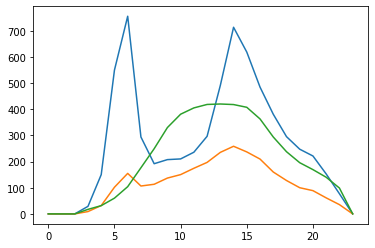

In [30]:
plt.plot(model.cluster_centers_.T)
None

In [31]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0], dtype=int32)

<AxesSubplot:>

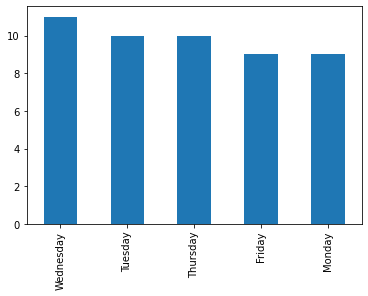

In [32]:
pandas.to_datetime(
    df_hourly.index
)[model.labels_ == 0].day_name().value_counts().plot.bar()

<AxesSubplot:>

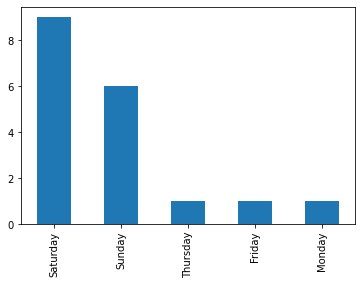

In [33]:
pandas.to_datetime(
    df_hourly.index
)[model.labels_ == 2].day_name().value_counts().plot.bar()

<AxesSubplot:>

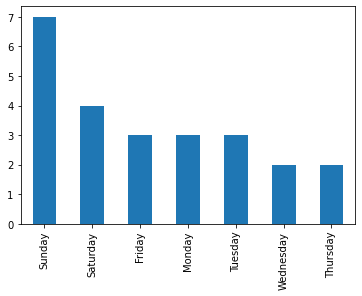

In [34]:
pandas.to_datetime(
    df_hourly.index
)[model.labels_ == 1].day_name().value_counts().plot.bar()

<AxesSubplot:xlabel='hour'>

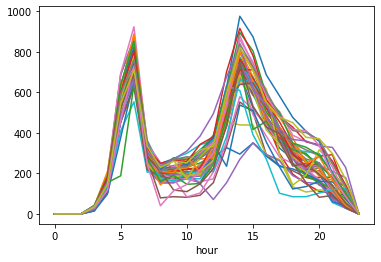

In [35]:
df_hourly.loc[model.labels_ == 0].T.plot(legend=False)

<AxesSubplot:xlabel='hour'>

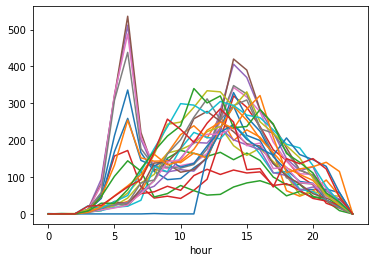

In [36]:
df_hourly.loc[model.labels_ == 1].T.plot(legend=False)

<AxesSubplot:xlabel='hour'>

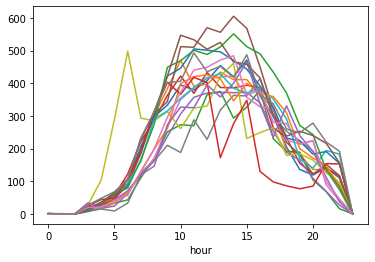

In [37]:
df_hourly.loc[model.labels_ == 2].T.plot(legend=False)

In [38]:
for cluster_number in [0,1,2]:
    dists = model.transform(
        df_hourly.loc[~model.labels_.astype(bool)])[:,cluster_number]
    print(sorted(((dists - dists.mean()) / dists.std())))

[-1.2476383687333605, -1.1996513982666976, -1.1547911426277107, -1.111283656572793, -1.0158483660294024, -0.943389724700251, -0.9298995354236255, -0.9069273435731093, -0.9016129786052856, -0.8814064432175737, -0.8042066611896141, -0.7669716451014557, -0.7607819629819066, -0.7516390945309012, -0.7148997948724128, -0.6790377881872057, -0.6739869212568401, -0.632608922676702, -0.5811829059411536, -0.5711792372761102, -0.5178412112555271, -0.5051203359978331, -0.48640762261282294, -0.48210483067076026, -0.398788067412554, -0.30335316961298603, -0.23059406931802165, -0.11709313629200294, -0.11121019712277418, 0.01672147889378287, 0.08855543060897396, 0.18089666563874132, 0.1946206028472319, 0.22205754604325986, 0.6279459134579046, 0.6444458036728627, 0.736112468986989, 0.7610917853546406, 0.84871115195058, 1.0655017196512433, 1.1384183231941463, 1.1432323347783175, 1.1951803003858255, 1.2728290563097446, 1.297523473149981, 1.8792555504152513, 1.8870571478318927, 2.216633802574651, 2.9646659